# Matplotlib excercises

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
flights=sns.load_dataset("flights")

In [3]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
data = flights['passengers'].groupby(flights['year']).agg(np.mean)
data

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: passengers, dtype: float64

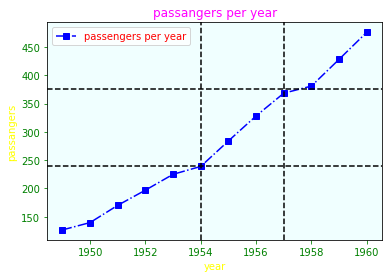

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
my_plot = plt.plot(data, 'bs-.')
l = plt.legend(my_plot, ["passengers per year"])
l.get_texts()[0].set_color('red')
ax.set_facecolor('azure')
ax.tick_params(colors='green')
ax.set_title('passangers per year', color='magenta')
plt.ylabel('passangers')
plt.xlabel('year')
ax.xaxis.label.set_color('yellow')
ax.yaxis.label.set_color('yellow')
ax.axhline(y=240,color='k', linestyle='--')
ax.axhline(y=375,color='k', linestyle='--')
ax.axvline(x=1954,color='k', linestyle='--')
ax.axvline(x=1957,color='k', linestyle='--')
plt.show()

In [6]:
tips = sns.load_dataset("tips")
smoker = tips.smoker.value_counts()
smoker

No     151
Yes     93
Name: smoker, dtype: int64

In [7]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
#         return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return f'{pct:.2f}% ({val:d})'
    return my_autopct

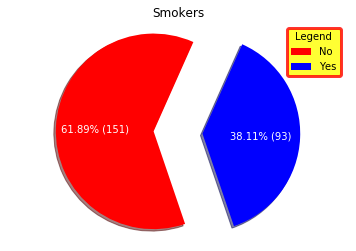

In [10]:
plt.pie(smoker.values,
        textprops={"color":"white"},
        labels=smoker.index,
        colors=["r","b"],
        shadow=True,
        startangle=66,
        explode=(0.2,0.3),
        autopct=make_autopct(smoker.values)) #autopct="%1.2f%%"
plt.axis("equal")
leg = plt.legend(title="Legend", frameon=True)
# leg = plt.legend()
leg.get_frame().set_edgecolor('r')
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_facecolor("yellow")
plt.title("Smokers")
plt.show()

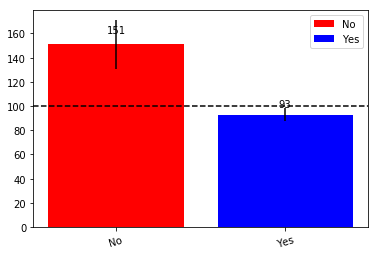

In [12]:
ax = plt.subplot()
rects = ax.bar([1,2], smoker.values,color=["red", "blue"], yerr=(20,5))
ax.set_xticks([1,2])
ax.set_xticklabels(smoker.index , rotation=17)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects)
# ax.title("Smokers")
# ax.ylabel("count")
# plt.legend()
ax.legend(rects, ("No", "Yes"))
ax.set_facecolor("white")
# ax.grid(True, linestyle='--', linewidth=1, color="gray")

# ax.grid(False)
ax.axhline(y=100, color='k', linestyle="--")

plt.show()

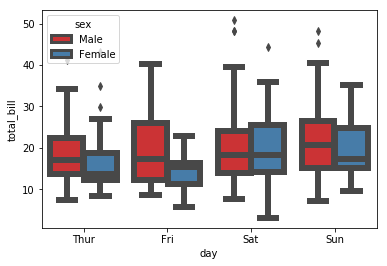

In [13]:
sns.boxplot(tips["day"],
            tips["total_bill"],
            tips["sex"],
            palette="Set1",
            linewidth=6)
plt.show()

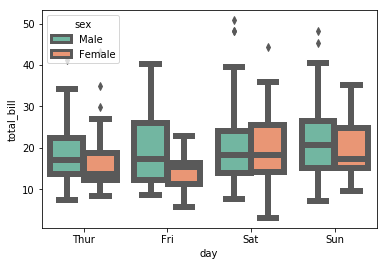

In [14]:
sns.boxplot(tips["day"],
            tips["total_bill"],
            tips["sex"],
            palette="Set2",
            linewidth=6)
plt.show()

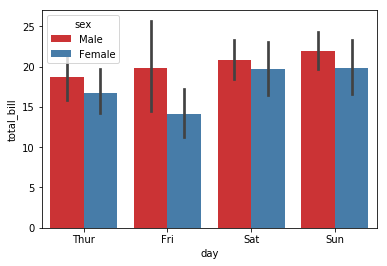

In [15]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set1")
plt.show()

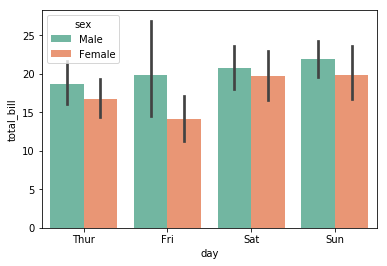

In [16]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2")
plt.show()

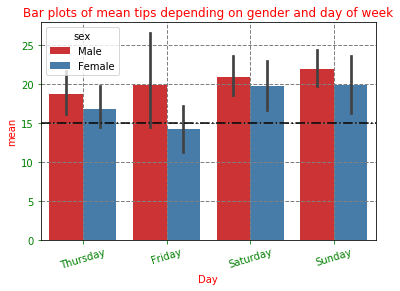

In [17]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set1")

ax.grid(True, linestyle='--', linewidth=1, color="gray")

# ax.grid(False)
ax.axhline(y=15, color='k', linestyle="-.")

#ax.set_xticks([1,2])
ax.set_xticklabels(["Thursday", "Friday", "Saturday", "Sunday"] , rotation=17)

ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='green')

ax.set_xlabel("Day")
ax.set_ylabel("mean")

ax.yaxis.label.set_color('red') 
ax.xaxis.label.set_color('red')
ax.title.set_color("red")

ax.set_title("Bar plots of mean tips depending on gender and day of week")

plt.show()

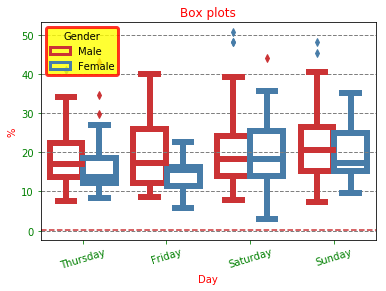

In [19]:
ax = plt.subplot()
ax.set_facecolor("white")
ax.grid(True, linestyle='--', linewidth=1, color="gray")

# ax.grid(False)
ax.axhline(y=0.2, color='k', linestyle="--")
#sns.boxplot(tips["day"], tips["tip_frac"], tips["sex"], palette=["0.95", "0.65"])

# sns.boxplot(tips["day"], tips["tip_frac"], tips["sex"], palette=["red", "blue"], linewidth=6)
sns.boxplot(tips["day"], tips["total_bill"], tips["sex"], palette="Set1", linewidth=6)


#ax.set_xticks([1,2])
ax.set_xticklabels(["Thursday", "Friday", "Saturday", "Sunday"] , rotation=17)

ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='green')

ax.set_xlabel("Day")
ax.set_ylabel("%")

ax.yaxis.label.set_color('red') 
ax.xaxis.label.set_color('red')
ax.title.set_color("red")

ax.set_title("Box plots")

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

leg = plt.legend(title="Gender", frameon=True)
# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')


# leg = plt.legend()
leg.get_frame().set_edgecolor('r')
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_facecolor("yellow")

plt.show()